# Ejercicio 3: Representación Gráfica de Vectores de Documentos y Consultas

## Objetivo de la práctica
- Comprender la representación de documentos y consultas en el modelo de espacio vectorial, mediante el cálculo de matrices término-documento usando medidas como TF y TF-IDF.
- Aplicar la similitud coseno para comparar documentos con consultas, y utilizarla para recuperar y ordenar documentos según su relevancia.
- Visualizar de forma intuitiva los vectores de documentos y consultas, mediante reducción de dimensionalidad y representación gráfica en el plano, para facilitar la interpretación geométrica de la recuperación de información.

## Parte 1: Construcción de la matriz término-documento y TF-IDF

### Actividad
1. Usa el siguiente corpus de 4 documentos.
2. Vectoriza los documentos usando:
   - Frecuencia absoluta (TF)
   - TF-IDF
3. Visualiza los documentos como un gráfico de dispersión 2D y 3D.

In [71]:
import pandas as pd

In [72]:
documents = [
    "El gato se escondió debajo de la cama.",
    "La cama estaba limpia y cómoda.",
    "El perro y el gato jugaron en el jardín.",
    "La limpieza del jardín es importante."
]
# Creacion del vocabulario
vocabulario= set()
for doc in documents:
    for word in doc.lower().strip(".").split(sep=" "):
        vocabulario.add(word)
print(vocabulario)
print(len(vocabulario))

# Creacion del diccionario y Representación TF
diccionario_tf={}
i = 0
for doc in documents:
    diccionario_tfd={}
    
    for termino in vocabulario:
        count = doc.lower().strip(".").split().count(termino)
        diccionario_tfd[termino] = count
        
    diccionario_tf[i] = diccionario_tfd
    i+=1
print(diccionario_tf)

{'cómoda', 'gato', 'se', 'limpieza', 'perro', 'en', 'limpia', 'y', 'escondió', 'estaba', 'el', 'jardín', 'de', 'la', 'importante', 'debajo', 'jugaron', 'del', 'es', 'cama'}
20
{0: {'cómoda': 0, 'gato': 1, 'se': 1, 'limpieza': 0, 'perro': 0, 'en': 0, 'limpia': 0, 'y': 0, 'escondió': 1, 'estaba': 0, 'el': 1, 'jardín': 0, 'de': 1, 'la': 1, 'importante': 0, 'debajo': 1, 'jugaron': 0, 'del': 0, 'es': 0, 'cama': 1}, 1: {'cómoda': 1, 'gato': 0, 'se': 0, 'limpieza': 0, 'perro': 0, 'en': 0, 'limpia': 1, 'y': 1, 'escondió': 0, 'estaba': 1, 'el': 0, 'jardín': 0, 'de': 0, 'la': 1, 'importante': 0, 'debajo': 0, 'jugaron': 0, 'del': 0, 'es': 0, 'cama': 1}, 2: {'cómoda': 0, 'gato': 1, 'se': 0, 'limpieza': 0, 'perro': 1, 'en': 1, 'limpia': 0, 'y': 1, 'escondió': 0, 'estaba': 0, 'el': 3, 'jardín': 1, 'de': 0, 'la': 0, 'importante': 0, 'debajo': 0, 'jugaron': 1, 'del': 0, 'es': 0, 'cama': 0}, 3: {'cómoda': 0, 'gato': 0, 'se': 0, 'limpieza': 1, 'perro': 0, 'en': 0, 'limpia': 0, 'y': 0, 'escondió': 0, 'es

In [73]:
matriz_tf = pd.DataFrame(diccionario_tf)
matriz_tf.T

,cómoda,gato,se,limpieza,perro,en,limpia,y,escondió,estaba,el,jardín,de,la,importante,debajo,jugaron,del,es,cama
0,0,1,1,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,0,1
1,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,1,1,0,1,0,0,3,1,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,0


In [74]:
matriz_tf.to_csv("MatrizTF.csv", index=True)

In [75]:
import math

In [77]:
# Representación TF-IDF
dN = len(documents)
print(dN)
idf = {}
for termino in vocabulario:
    n_t = sum(1 for doc in documents if termino in doc.lower().strip(".").split())
    idf[termino] = math.log(dN / (1 + n_t))

diccionario_tfidf = {}
for i in range(dN):
    tfidf_doc = {}
    for termino in vocabulario:
        tf = diccionario_tf[i][termino]  # frecuencia absoluta ya calculada
        tfidf = tf * idf[termino]
        tfidf_doc[termino] = tfidf
    diccionario_tfidf[i] = tfidf_doc



4


In [78]:
matriz_tfidf = pd.DataFrame(diccionario_tfidf)
matriz_tfidf.T.round(3)

,cómoda,gato,se,limpieza,perro,en,limpia,y,escondió,estaba,el,jardín,de,la,importante,debajo,jugaron,del,es,cama
0,0.000,0.288,0.693,0.000,0.000,0.000,0.000,0.000,0.693,0.000,0.288,0.000,0.693,0.0,0.000,0.693,0.000,0.000,0.000,0.288
1,0.693,0.000,0.000,0.000,0.000,0.000,0.693,0.288,0.000,0.693,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.288
2,0.000,0.288,0.000,0.000,0.693,0.693,0.000,0.288,0.000,0.000,0.863,0.288,0.000,0.0,0.000,0.000,0.693,0.000,0.000,0.000
3,0.000,0.000,0.000,0.693,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.288,0.000,0.0,0.693,0.000,0.000,0.693,0.693,0.000


In [79]:
matriz_tfidf

,0,1,2,3
cómoda,0.000000,0.693147,0.000000,0.000000
gato,0.287682,0.000000,0.287682,0.000000
se,0.693147,0.000000,0.000000,0.000000
limpieza,0.000000,0.000000,0.000000,0.693147
perro,0.000000,0.000000,0.693147,0.000000
en,0.000000,0.000000,0.693147,0.000000
limpia,0.000000,0.693147,0.000000,0.000000
y,0.000000,0.287682,0.287682,0.000000
escondió,0.693147,0.000000,0.000000,0.000000
estaba,0.000000,0.693147,0.000000,0.000000


In [80]:
matriz_tfidf.to_csv("MatrizTFIDF.csv", index=True)

In [81]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

### Representacion 2D

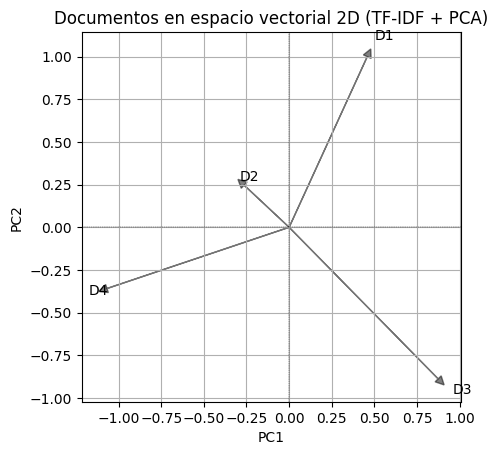

In [82]:
# Reducción PCA y visualización 2D
pca = PCA(n_components=2)
docs_2d = pca.fit_transform(matriz_tfidf.T.values)
docs_2d
for i, (x,y) in enumerate(docs_2d):
    plt.arrow(0,0,x,y,head_width = 0.05, head_length=0.05, fc='black', ec='black', alpha= 0.5)
    plt.text(x * 1.1, y * 1.1, f'D{i+1}', fontsize=10)

plt.title("Documentos en espacio vectorial 2D (TF-IDF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axhline(0, color='black', linestyle='--', linewidth=0.3)
plt.axvline(0, color='black', linestyle='--', linewidth=0.3)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


### Representacion 3D

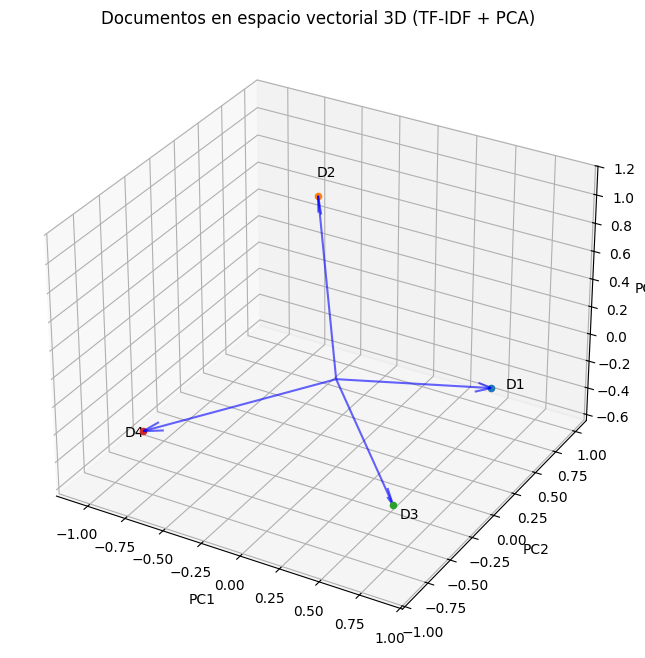

In [83]:

pca = PCA(n_components=3)
docs_3d = pca.fit_transform(matriz_tfidf.T)
docs_3d

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Dibujar vectores y puntos
for i, (x, y, z) in enumerate(docs_3d):
    ax.quiver(0, 0, 0, x, y, z, color='blue', alpha=0.6, arrow_length_ratio=0.1)
    ax.scatter(x, y, z, label=f'Documento {i+1}')
    ax.text(x * 1.1, y * 1.1, z * 1.1, f'D{i+1}', fontsize=10)

ax.set_title('Documentos en espacio vectorial 3D (TF-IDF + PCA)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.grid(True)
plt.show()

## Parte 2: Representación de la consulta como vector

### Actividad
1. Ingresa una consulta como texto.
2. Representa la consulta en el mismo espacio vectorial que los documentos.
3. Calcula similitud coseno entre la consulta y cada documento.
4. Visualiza la consulta como un vector en el mismo espacio vectorial que los documentos.

In [102]:
#MATRIZ TFIDF
matriz_tf = pd.DataFrame(diccionario_tf).T
matriz_tfidf = pd.DataFrame(diccionario_tfidf).T

# PCA
pca = PCA(n_components=3)
docs_3d = pca.fit_transform(matriz_tfidf.values)



In [99]:
# Consulta
consulta = "importante limpieza gato"
consulta_tf = {termino: consulta.lower().split().count(termino) for termino in vocabulario}
consulta_tfidf = {termino: consulta_tf[termino] * idf[termino] for termino in vocabulario}
consulta_vector = np.array(list(consulta_tfidf.values())).reshape(1, -1)
consulta_3d = pca.transform(consulta_vector)


In [92]:
from sklearn.metrics.pairwise import cosine_similarity

In [104]:
# Similitud coseno
similitudes = cosine_similarity(consulta_vector, matriz_tfidf.values)[0]
for i, sim in enumerate(similitudes):
    print(f"Similitud del coseno entre la query y el documento {i+1}: {sim:.3f}")


Similitud del coseno entre la query y el documento 1: 0.055
Similitud del coseno entre la query y el documento 2: 0.000
Similitud del coseno entre la query y el documento 3: 0.052
Similitud del coseno entre la query y el documento 4: 0.664


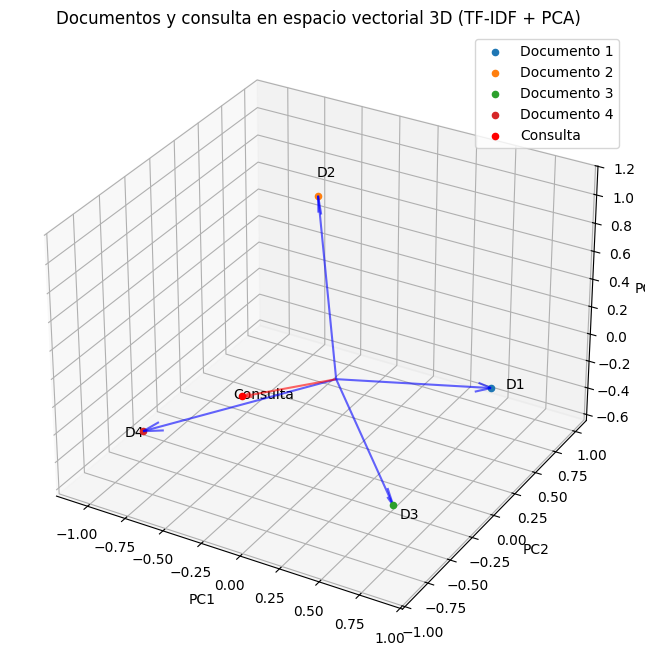

In [101]:
# Visualización
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Documentos
for i, (x, y, z) in enumerate(docs_3d):
    ax.quiver(0, 0, 0, x, y, z, color='blue', alpha=0.6, arrow_length_ratio=0.1)
    ax.scatter(x, y, z, label=f'Documento {i+1}')
    ax.text(x * 1.1, y * 1.1, z * 1.1, f'D{i+1}', fontsize=10)

# Consulta
x, y, z = consulta_3d[0]
ax.quiver(0, 0, 0, x, y, z, color='red', alpha=0.6, arrow_length_ratio=0.1)
ax.scatter(x, y, z, color='red', label='Consulta')
ax.text(x * 1.1, y * 1.1, z * 1.1, 'Consulta', fontsize=10)

ax.set_title('Documentos y consulta en espacio vectorial 3D (TF-IDF + PCA)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.grid()
plt.legend()
plt.show()


## Parte 3: Consulta por similitud y ranking de documentos

### Actividad
1. Con la misma representación de vectores, implementar una función que devuelva los documentos más relevantes a una consulta usando similitud coseno.
2. Dibuja los vectores (de documentos y de consulta) como flechas desde el origen usando `plt.quiver()` o `plt.arrow()`

Ranking de documentos por similitud coseno:
1. Documento 4: Similitud coseno = 0.664
2. Documento 1: Similitud coseno = 0.055
3. Documento 3: Similitud coseno = 0.052
4. Documento 2: Similitud coseno = 0.000


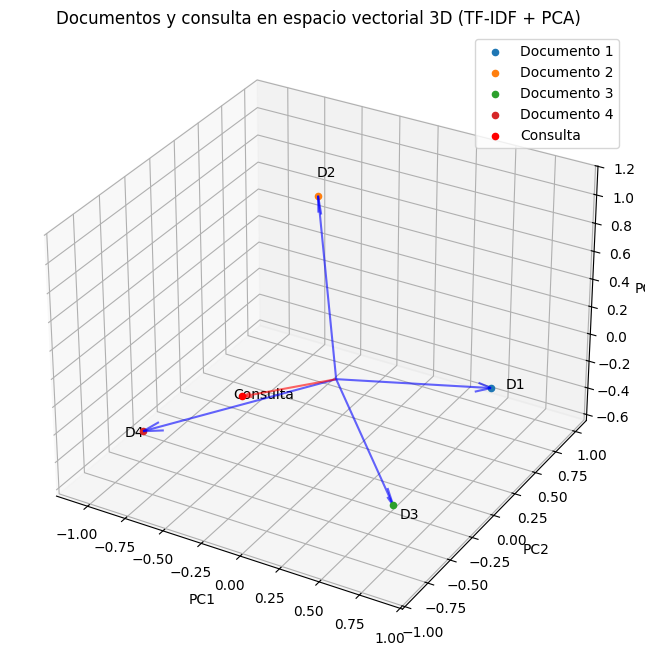

In [105]:
# Función para calcular similitud coseno y ranking de documentos
def consulta_similitud(consulta):
    consulta_tf = {termino: consulta.lower().split().count(termino) for termino in vocabulario}
    consulta_tfidf = {termino: consulta_tf[termino] * idf[termino] for termino in vocabulario}
    consulta_vector = np.array(list(consulta_tfidf.values())).reshape(1, -1)
    consulta_3d = pca.transform(consulta_vector)
    
    # Similitud coseno
    similitudes = cosine_similarity(consulta_vector, matriz_tfidf.values)[0]
    ranking = sorted(enumerate(similitudes), key=lambda x: x[1], reverse=True)
    
    return consulta_3d, ranking

# Consulta
consulta = "limpieza del gato"
consulta_3d, ranking = consulta_similitud(consulta)

# Mostrar ranking de documentos
print("Ranking de documentos por similitud coseno:")
for rank, (i, sim) in enumerate(ranking, 1):
    print(f"{rank}. Documento {i+1}: Similitud coseno = {sim:.3f}")

# Visualización
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Documentos
for i, (x, y, z) in enumerate(docs_3d):
    ax.quiver(0, 0, 0, x, y, z, color='blue', alpha=0.6, arrow_length_ratio=0.1)
    ax.scatter(x, y, z, label=f'Documento {i+1}')
    ax.text(x * 1.1, y * 1.1, z * 1.1, f'D{i+1}', fontsize=10)

# Consulta
x, y, z = consulta_3d[0]
ax.quiver(0, 0, 0, x, y, z, color='red', alpha=0.6, arrow_length_ratio=0.1)
ax.scatter(x, y, z, color='red', label='Consulta')
ax.text(x * 1.1, y * 1.1, z * 1.1, 'Consulta', fontsize=10)

ax.set_title('Documentos y consulta en espacio vectorial 3D (TF-IDF + PCA)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.grid(True)
plt.legend()
plt.show()
